In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

number of runs: 10000
[0] minimum sample size per bin: 78
number of runs: 10000
[1] minimum sample size per bin: 77
number of runs: 10000
[2] minimum sample size per bin: 75
number of runs: 10000
[3] minimum sample size per bin: 71


(0.0, 1.0)

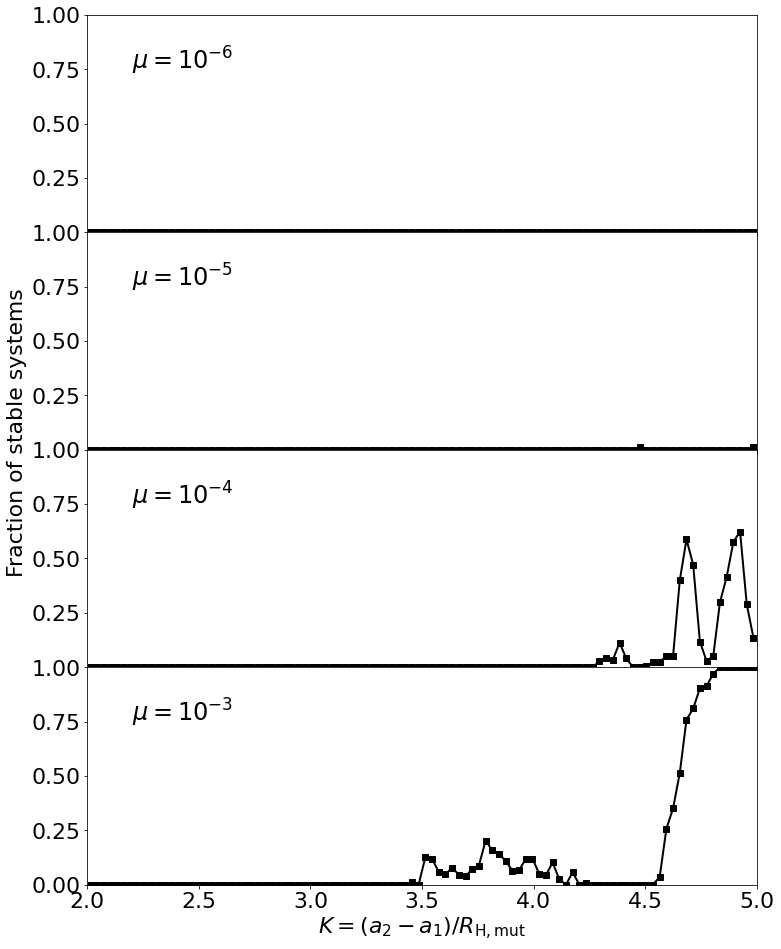

In [3]:
def resonance_to_K(res_val,mu):
    #P1 = 1**(-1.5)
    #P2 = P1*res_val
    a1 = 1. #P1**(2./3.)
    a2 = a1*(res_val)**(2./3.) #P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH, a2

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/res/3p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    #data = np.load('./data/1p/t0-m1e-%1d-new.npy'%(dir_name_list[iii]))
    print('number of runs:',len(data[:,0]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2)
    
    dpc = 0.04
                
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])
    axs[iii].text(2.2,0.75,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,5.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-fraction_nf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-fraction_nf-wRH-rev.png',bbox_inches='tight',transparent=True)

[1.14390528] [0.00344618] 2.984848484848485 32.71411798327691 5.157462615695978 3.409066111219641
[1.26407315] [0.0039256] 2.893939393939394 15.924494270799478 5.107366952636486 3.5251800383167655
[1.67346414] [0.00652754] 2.772727272727273 7.977139833422881 4.624068288426171 3.4289425872818153
[2.12858244] [0.01262017] 2.6515151515151514 4.139007178952445 4.240884563518008 3.301292108535473


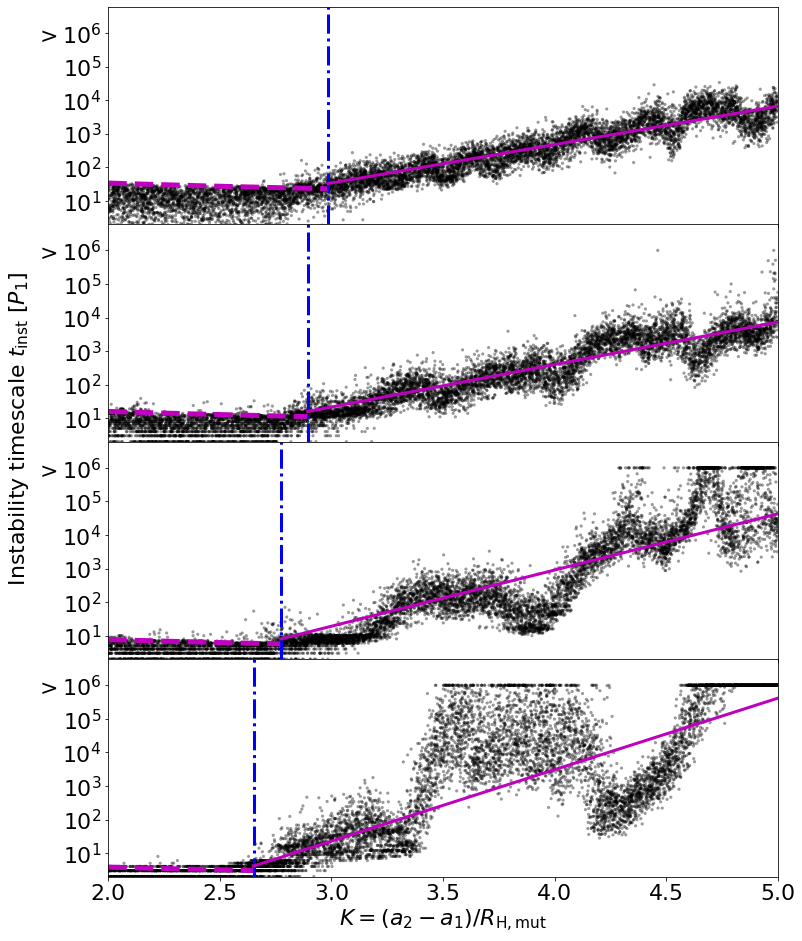

In [5]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn


cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/res/3p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='k',s=10,alpha=0.4,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([2.0e0,6e6])
    axs[iii].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    axs[iii].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$>10^{6}$'])
    
    Tsyn = K_to_Tsyn(K,mu*3)
    Kl = np.linspace(2,5,100)
    Tsynl =  K_to_Tsyn(Kl,mu*3)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu*3)        
    axs[iii].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    axs[iii].axvline(x=Ksyn,c='b',lw=3,ls='-.')

    
    Tsyn_0 = K_to_Tsyn(Ksyn,mu)
    def Tins_fit(K,b):
        return b*(K-Ksyn)+np.log10(Tsyn_0)
    
    ind_fit = (K>Ksyn) * (data[:,0]<0.5)
    X_fit = K[ind_fit]
    Y_fit = np.log10(Tinst[ind_fit])
    popt, pcov = curve_fit(Tins_fit, X_fit, Y_fit)
    b = popt[0]
    print(popt,np.sqrt(np.diag(pcov)),Ksyn,Tsyn_0,(np.log10(1e4/Tsyn_0)/b+Ksyn),(np.log10(1e2/Tsyn_0)/b+Ksyn))
    kk_fit = np.linspace(Ksyn,5,11)
    axs[iii].plot(kk_fit, 10**(Tins_fit(kk_fit, *popt)), color='m', linewidth=3)

    
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1].set_xlim([2.0,5.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-time_nf-N3-T6-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_nf-N3-T6-rev.png',bbox_inches='tight',transparent=True)

(2.0, 5.0)

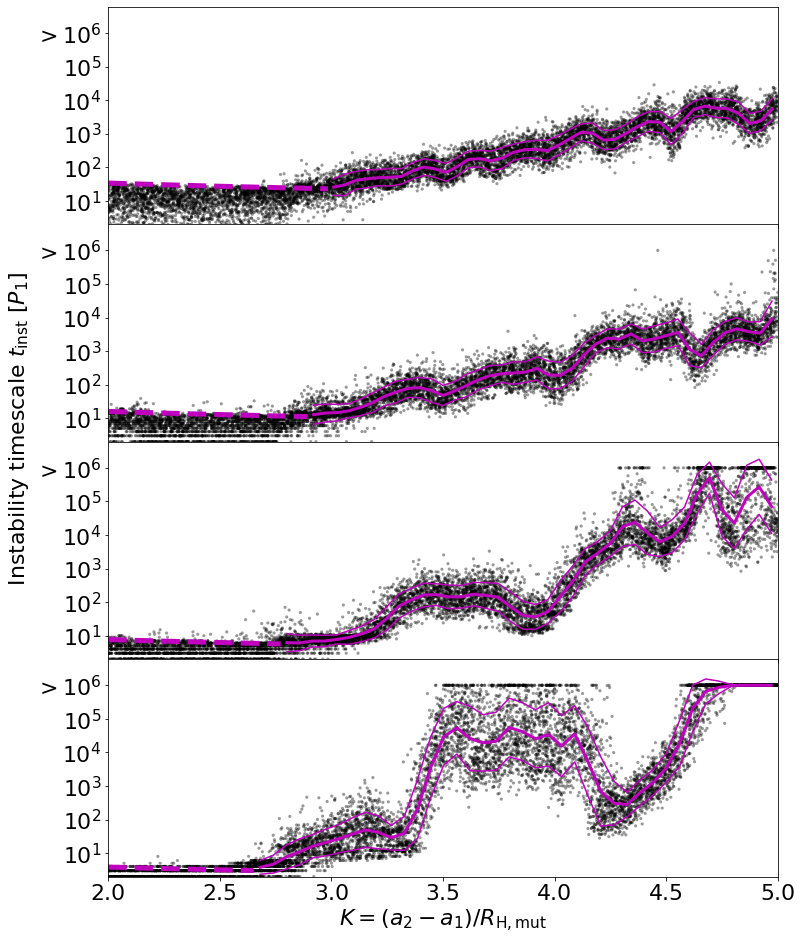

In [4]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn


cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/res/3p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='k',s=10,alpha=0.4,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([2.0e0,6e6])
    axs[iii].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    axs[iii].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$>10^{6}$'])
    
    Tsyn = K_to_Tsyn(K,mu*3)
    Kl = np.linspace(2,5,100)
    Tsynl =  K_to_Tsyn(Kl,mu*3)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu*3)        
    axs[iii].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    
    Nfit = 40
    edges = np.linspace(Ksyn,5.0,Nfit+1)
    Kl = np.zeros(Nfit)
    Tl = np.zeros(Nfit)
    dTl = np.zeros(Nfit)
    for i in range(Nfit):
        ind_i = (K>edges[i]) * (K<edges[i+1])# * (data[:,0]<0.5)
        Kl[i] =  0.5*(edges[i]+edges[i+1])
        Tl[i] =  np.mean(np.log10(Tinst[ind_i]))
        dTl[i] = np.std(np.log10(Tinst[ind_i]))
    axs[iii].plot(Kl, 10**(Tl), color='m', linewidth=3)
    axs[iii].plot(Kl, 10**(Tl+dTl), color='m', linewidth=1.5)
    axs[iii].plot(Kl, 10**(Tl-dTl), color='m', linewidth=1.5)

    
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1].set_xlim([2.0,5.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-time_nf-N3-T6-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-time_nf-N3-T6-rev.png',bbox_inches='tight',transparent=True)